In [78]:
# Import Libraries and Dependecies
import pandas as pd
import numpy as np
from pathlib import Path
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import yfinance as yf
import warnings
from pandas.tseries.offsets import DateOffset
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Ignore all warnings within this code block
warnings.filterwarnings("ignore")

In [79]:
# Load the CSV file for CNBC headlines
cnbc = Path('../Resources/cnbc_headlines.csv')
df_cnbc = pd.read_csv(cnbc)
df_cnbc.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."


In [80]:
# Load the CSV file for CNBC headlines
cnbc = Path('../Resources/cnbc_headlines.csv')
df_cnbc = pd.read_csv(cnbc)

# Convert the "Time" column to datetime
df_cnbc['Time'] = pd.to_datetime(df_cnbc['Time'])

# Sort the DataFrame by the "Time" column in ascending order
df_cnbc.sort_values(by='Time', inplace=True)

# Set the "Time" column as the index
df_cnbc.set_index('Time', inplace=True)
# Keep only Date (YYYY-MM-DD)
df_cnbc.index = pd.to_datetime(df_cnbc.index.date)
# Rename Index
df_cnbc.index = df_cnbc.index.rename('Time')

# Drop Nulls
df_cnbc.dropna(inplace=True)

# Display Dataframe
df_cnbc.head()

,Headlines,Description
Time,,
2017-12-22,Cramer: Never buy a stock all at once — you'll...,Jim Cramer doubled down on his key investing r...
2017-12-22,Cramer: I helped investors through the 2010 fl...,"Jim Cramer built on his ""nobody ever made a di..."
2017-12-22,Cramer says owning too many stocks and too lit...,Jim Cramer broke down why owning fewer stocks ...
2017-12-26,Markets lack Christmas cheer,"According to Kensho, here's how markets have f..."
2017-12-27,S&P tends to start new year bullish after this...,The S&P is on track to end the year up 20 perc...


In [81]:
# Drop the "Description" column in place
df_cnbc.drop(columns=['Description'], inplace=True)

df_cnbc.reset_index()
# Remove the extra timestamp from the "Time" column
df_cnbc= df_cnbc.groupby('Time')['Headlines'].agg(' '.join).reset_index()

# Remove the extra timestamp from the "Time" column
df_cnbc= df_cnbc.set_index('Time')

df_cnbc_copy = df_cnbc.copy()

df_cnbc_copy

,Headlines
Time,
2017-12-22,Cramer: Never buy a stock all at once — you'll...
2017-12-26,Markets lack Christmas cheer
2017-12-27,S&P tends to start new year bullish after this...
2018-01-02,The major indexes trade lower in January Crame...
2018-01-03,Markets after S&P gains 15% in a year Cramer's...
...,...
2020-07-13,Cramer's earnings watch: 'If the banks get ham...
2020-07-14,Charts suggest the S&P 500 climb will stall ou...
2020-07-15,Cramer: We desperately need another round of f...


In [86]:
# create a function to calculate the subjectivity
def calculate_subjectivity(headlines):
    return TextBlob(headlines).sentiment.subjectivity

# create a function to calculate the subjectivity
def calculate_polarity(headlines):
    return TextBlob(headlines).sentiment.polarity


In [87]:
# create two new columns "Subjectivity" and "Polarity"
df_reuters_copy["Subjectivity_reuters"] = df_reuters_copy["Headlines"].apply(calculate_subjectivity)
df_reuters_copy["Polarity_reuters"] = df_reuters_copy["Headlines"].apply(calculate_polarity)

In [88]:
# create function to get the sentiment scores 
def get_scores(headlines):
    get_score= SentimentIntensityAnalyzer()
    sentiment=get_score.polarity_scores(headlines)
    return sentiment

# create function to get the sentiment scores 
def get_scores(headlines):
    get_score= SentimentIntensityAnalyzer()
    sentiment=get_score.polarity_scores(headlines)
    return sentiment

In [89]:
# create two new columns "Subjectivity" and "Polarity"
df_cnbc_copy["Subjectivity_cnbc"] = df_cnbc_copy["Headlines"].apply(calculate_subjectivity)
df_cnbc_copy["Polarity_cnbc"] = df_cnbc_copy["Headlines"].apply(calculate_polarity)

In [90]:
# get daily sentiment scores
compound = []
neg = []
pos = []
neu = []
score = 0

for x in range(0, len(df_cnbc_copy["Headlines"])):
    score = get_scores(df_cnbc_copy["Headlines"][x])
    compound.append(score["compound"])
    neg.append(score["neg"])
    neu.append(score["neu"])
    pos.append(score["pos"])

In [91]:
# Add Column with sentiment scores
df_cnbc_copy["compound_cnbc"]= compound
df_cnbc_copy["neg_cnbc"]= neg
df_cnbc_copy["pos_cnbc"]= pos
df_cnbc_copy["neu_cnbc"]= neu

#Display Dataframe
df_cnbc_copy.drop(columns="Headlines", inplace=True)
df_cnbc_copy.head()

,Subjectivity_cnbc,Polarity_cnbc,compound_cnbc,neg_cnbc,pos_cnbc,neu_cnbc
Time,,,,,,
2017-12-22,0.483333,-0.000694,-0.5563,0.121,0.049,0.830
2017-12-26,0.000000,0.000000,0.2500,0.303,0.434,0.263
2017-12-27,0.454545,0.136364,0.0000,0.000,0.000,1.000
2018-01-02,0.470370,0.056713,0.8456,0.032,0.161,0.807
2018-01-03,0.495000,0.075000,0.6159,0.121,0.188,0.691


array([[<Axes: title={'center': 'Subjectivity_cnbc'}>,
        <Axes: title={'center': 'Polarity_cnbc'}>],
       [<Axes: title={'center': 'compound_cnbc'}>,
        <Axes: title={'center': 'neg_cnbc'}>],
       [<Axes: title={'center': 'pos_cnbc'}>,
        <Axes: title={'center': 'neu_cnbc'}>]], dtype=object)

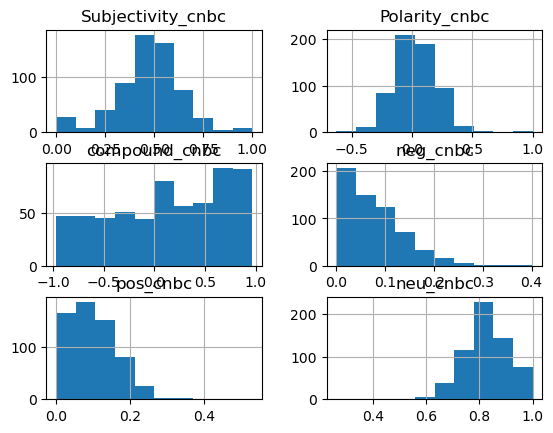

In [92]:
df_cnbc_copy.hist()

In [108]:
# Read sp500 file
sp500 = Path('../Resources/sp500.csv')

df_sp500 = pd.read_csv(sp500, index_col="Date", parse_dates=True, infer_datetime_format=True)
df_sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-01,264.760010,265.309998,260.760010,264.459991,238.922836,164390900
2017-12-04,266.309998,266.799988,264.079987,264.140015,238.633682,94040600
2017-12-05,263.190002,265.149994,263.040009,263.190002,237.775452,77994500
2017-12-06,263.299988,263.730011,262.709991,263.239990,237.820602,75898600
2017-12-07,264.070007,264.429993,262.940002,264.070007,238.570450,77218600


In [109]:
# Convert index to datetime format to keep only date
df_sp500.index = pd.to_datetime(df_sp500.index.date)

In [112]:
# Join SP500 and CNBC data
cnbc_sp500= pd.concat([df_cnbc_copy, df_sp500],axis=1)
cnbc_sp500.tail()

,Subjectivity_cnbc,Polarity_cnbc,compound_cnbc,neg_cnbc,pos_cnbc,neu_cnbc,Open,High,Low,Close,Adj Close,Volume
2020-07-13,0.540000,0.100000,-0.7579,0.189,0.115,0.696,320.130005,322.709991,314.130005,314.839996,299.898224,102997500.0
2020-07-14,0.633333,0.166667,-0.2960,0.088,0.000,0.912,313.299988,319.760010,312.000000,318.920013,303.784546,93657000.0
2020-07-15,0.563636,-0.215909,-0.3468,0.109,0.055,0.836,322.410004,323.040009,319.269989,321.850006,306.575500,87196500.0
2020-07-16,0.596875,0.009375,-0.2960,0.045,0.000,0.955,319.790009,321.279999,319.089996,320.790009,305.565765,54622500.0
2020-07-17,0.500000,0.180000,0.7650,0.000,0.139,0.861,321.880005,322.570007,319.739990,321.720001,306.451660,62774900.0


In [48]:
# Display columns
cnbc_sp500.columns

Index(['Subjectivity_cnbc', 'Polarity_cnbc', 'compound_cnbc', 'neg_cnbc',
       'pos_cnbc', 'neu_cnbc', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')

In [113]:
# Calculate daily returns
cnbc_sp500["daily_returns"]= cnbc_sp500["Close"].pct_change()

In [114]:
# Calculate short and long window
cnbc_sp500["sma_short"]= cnbc_sp500.rolling(3)["Close"].mean()
cnbc_sp500["sma_long"]= cnbc_sp500.rolling(15)["Close"].mean()
cnbc_sp500.dropna(inplace=True)

In [115]:
# create features variable with columns for X
features=['Subjectivity_cnbc', 'Polarity_cnbc', 'compound_cnbc', 'neg_cnbc',
       'pos_cnbc', 'neu_cnbc','sma_short','sma_long', 'Volume']

# Create X variable, shift and dropna
X = cnbc_sp500[features].shift().dropna().copy()
X.tail()

,Subjectivity_cnbc,Polarity_cnbc,compound_cnbc,neg_cnbc,pos_cnbc,neu_cnbc,sma_short,sma_long,Volume
2020-07-13,0.427273,-0.031818,0.0000,0.000,0.000,1.000,312.133331,311.472662,80828700.0
2020-07-14,0.540000,0.100000,-0.7579,0.189,0.115,0.696,315.603333,310.903328,102997500.0
2020-07-15,0.633333,0.166667,-0.2960,0.088,0.000,0.912,317.116669,311.456663,93657000.0
2020-07-16,0.563636,-0.215909,-0.3468,0.109,0.055,0.836,318.536672,312.109998,87196500.0
2020-07-17,0.596875,0.009375,-0.2960,0.045,0.000,0.955,320.520009,313.223332,54622500.0


In [70]:
# Create y variable for y
y=(cnbc_sp500['daily_returns']>0).astype(int)[1:]

In [116]:
# Verify lenght of x and y are the same
display(len(X))
display(len(y))

405

405

In [117]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=2)

# Display the training end date
print(training_end)

# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train.head()

# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(hours=1):]
y_test = y.loc[training_end+DateOffset(hours=1):]

# Review the X_test DataFrame
X_train.head()

2017-12-26 00:00:00
2018-02-26 00:00:00


,Subjectivity_cnbc,Polarity_cnbc,compound_cnbc,neg_cnbc,pos_cnbc,neu_cnbc,sma_short,sma_long,Volume
2017-12-26,0.483333,-0.000694,-0.5563,0.121,0.049,0.830,267.373332,265.976670,78720900.0
2017-12-27,0.000000,0.000000,0.2500,0.303,0.434,0.263,267.426666,266.180003,45244400.0
2018-01-02,0.454545,0.136364,0.0000,0.000,0.000,1.000,267.340007,266.455337,57751000.0
2018-01-03,0.470370,0.056713,0.8456,0.032,0.161,0.807,267.833323,267.167334,86655700.0
2018-01-04,0.495000,0.075000,0.6159,0.121,0.188,0.691,268.699992,267.444668,90070400.0


In [118]:
## Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [119]:
## Use a classifier to predict future results

# From SVM, instantiate SVC classifier model instance
svm_model = svm.SVC()
 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

# Review the model's predicted values
svm_pred[:10]

# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, svm_pred)

# Print the classification report
print(svm_testing_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       164
           1       0.58      1.00      0.73       222

    accuracy                           0.58       386
   macro avg       0.29      0.50      0.37       386
weighted avg       0.33      0.58      0.42       386



In [120]:
# Instantiate LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()

In [121]:
# Fit the model to the data using the training data
linear_disc_model = model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
linear_disc_model = model.predict(X_test_scaled)

# Review the model's predicted values
linear_disc_model[:10]

# Use a classification report to evaluate the model using the predictions and testing data
linear_disc_testing_report = classification_report(y_test, linear_disc_model)

# Print the classification report
print(linear_disc_testing_report)


              precision    recall  f1-score   support

           0       0.45      0.23      0.30       164
           1       0.58      0.79      0.67       222

    accuracy                           0.55       386
   macro avg       0.51      0.51      0.49       386
weighted avg       0.52      0.55      0.51       386



In [122]:
# Read TESLA file
tsla = Path('../Resources/tsla.csv')

df_tsla = pd.read_csv(tsla, index_col="Date", parse_dates=True, infer_datetime_format=True)
df_tsla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-01,20.362667,20.688000,20.336666,20.435333,20.435333,64393500
2017-12-04,20.433332,20.551332,20.040667,20.346666,20.346666,87526500
2017-12-05,20.133333,20.533333,20.066668,20.246668,20.246668,69697500
2017-12-06,20.006666,20.892668,20.000000,20.884001,20.884001,107929500
2017-12-07,20.799999,21.242001,20.736668,20.749332,20.749332,71709000


In [123]:
# Convert index to datetime format to keep only date
df_tsla.index = pd.to_datetime(df_tsla.index.date)

In [126]:
# Join SP500 and CNBC data
cnbc_tsla= pd.concat([df_cnbc_copy, df_tsla],axis=1)
cnbc_tsla.head(100)

,Subjectivity_cnbc,Polarity_cnbc,compound_cnbc,neg_cnbc,pos_cnbc,neu_cnbc,Open,High,Low,Close,Adj Close,Volume
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,20.362667,20.688000,20.336666,20.435333,20.435333,64393500.0
2017-12-04,NaN,NaN,NaN,NaN,NaN,NaN,20.433332,20.551332,20.040667,20.346666,20.346666,87526500.0
2017-12-05,NaN,NaN,NaN,NaN,NaN,NaN,20.133333,20.533333,20.066668,20.246668,20.246668,69697500.0
2017-12-06,NaN,NaN,NaN,NaN,NaN,NaN,20.006666,20.892668,20.000000,20.884001,20.884001,107929500.0
2017-12-07,NaN,NaN,NaN,NaN,NaN,NaN,20.799999,21.242001,20.736668,20.749332,20.749332,71709000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-18,0.250000,-0.100000,-0.6249,0.174,0.059,0.767,19.405333,20.016001,19.210667,19.556667,19.556667,98365500.0
2018-04-19,0.454286,0.101429,-0.9295,0.210,0.090,0.700,19.405333,20.067333,19.236668,20.005333,20.005333,91359000.0
2018-04-20,0.527778,-0.175000,0.3384,0.091,0.113,0.796,19.677999,19.998667,19.316668,19.349333,19.349333,84418500.0
2018-04-23,0.329464,0.010714,-0.9312,0.249,0.066,0.685,19.419333,19.441334,18.822001,18.891333,18.891333,73401000.0


In [127]:
# Calculate daily returns
cnbc_tsla["daily_returns"]= cnbc_tsla["Close"].pct_change()

In [128]:
# Calculate short and long window
cnbc_tsla["sma_short"]= cnbc_tsla.rolling(3)["Close"].mean()
cnbc_tsla["sma_long"]= cnbc_tsla.rolling(15)["Close"].mean()
cnbc_tsla.dropna(inplace=True)

In [182]:
# create features variable with columns for X
features=['Subjectivity_cnbc', 'Polarity_cnbc', 'compound_cnbc', 'neg_cnbc',
       'pos_cnbc', 'neu_cnbc','sma_short','sma_long', 'Volume']

# Create X variable, shift and dropna
X = cnbc_tsla[features].shift().dropna().copy()
X.tail()

,Subjectivity_cnbc,Polarity_cnbc,compound_cnbc,neg_cnbc,pos_cnbc,neu_cnbc,sma_short,sma_long,Volume
2020-07-13,0.427273,-0.031818,0.0000,0.000,0.000,1.000,66.175110,62.400889,146278500.0
2020-07-14,0.540000,0.100000,-0.7579,0.189,0.115,0.696,98.577558,79.481912,584781000.0
2020-07-15,0.633333,0.166667,-0.2960,0.088,0.000,0.912,101.300224,81.804045,351271500.0
2020-07-16,0.563636,-0.215909,-0.3468,0.109,0.055,0.836,101.330444,84.222845,245517000.0
2020-07-17,0.596875,0.009375,-0.2960,0.045,0.000,0.955,101.409999,86.621912,214512000.0


In [183]:
# Create y variable for y
y=(cnbc_tsla['daily_returns']>0).astype(int)[1:]

In [184]:
# Verify lenght of x and y are the same
display(len(X))
display(len(y))

405

405

In [185]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=2)

# Display the training end date
print(training_end)

# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train.head()

# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(hours=1):]
y_test = y.loc[training_end+DateOffset(hours=1):]

# Review the X_test DataFrame
X_train.head()

2017-12-26 00:00:00
2018-02-26 00:00:00


,Subjectivity_cnbc,Polarity_cnbc,compound_cnbc,neg_cnbc,pos_cnbc,neu_cnbc,sma_short,sma_long,Volume
2017-12-26,0.483333,-0.000694,-0.5563,0.121,0.049,0.830,21.907555,21.754000,63237000.0
2017-12-27,0.000000,0.000000,0.2500,0.303,0.434,0.263,21.647778,21.807733,65676000.0
2018-01-02,0.454545,0.136364,0.0000,0.000,0.000,1.000,21.202888,21.843022,70681500.0
2018-01-03,0.470370,0.056713,0.8456,0.032,0.161,0.807,21.049778,21.876844,65283000.0
2018-01-04,0.495000,0.075000,0.6159,0.121,0.188,0.691,21.091778,21.825022,67822500.0


In [186]:
## Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [187]:
## Use a classifier to predict future results

# From SVM, instantiate SVC classifier model instance
svm_model = svm.SVC()
 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

# Review the model's predicted values
svm_pred[:10]

# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, svm_pred)

# Print the classification report
print(svm_testing_report)

              precision    recall  f1-score   support

           0       0.35      0.03      0.06       178
           1       0.53      0.95      0.68       208

    accuracy                           0.53       386
   macro avg       0.44      0.49      0.37       386
weighted avg       0.45      0.53      0.40       386



In [193]:
# compare actual labels to predictions
# create lables with daily returns
cnbc_tsla["label"]= 0
cnbc_tsla.loc[(cnbc_tsla["daily_returns"]> 0), 'label'] = 1

# Slice data to compare same dates as predictions
actual_labels = cnbc_tsla["label"].loc["2018-02-26 00:00:00": "2020-07-17 00:00:00"]

# convert predictions to Dataframe
svm_predictions = pd.DataFrame(svm_pred, columns = ['Predictions'])
svm_predictions.index = actual_labels.index

# Merge both dataframes
comparison = pd.concat([actual_labels,svm_predictions], axis=1)

# Calculate the difference
comparison["Diff"]= comparison["label"]-comparison["Predictions"]
comparison.head()

,label,Predictions,Diff
2018-03-12,1,1,0
2018-03-13,0,1,-1
2018-03-14,0,1,-1
2018-03-15,0,1,-1
2018-03-16,0,0,0


In [197]:
# Display difference
diff_sum = comparison["Diff"].sum()
total = int(len(comparison))
display(f"{round(diff_sum/total,2)*100}%")

'-42.0%'

In [135]:
# Instantiate LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()

In [199]:
# Fit the model to the data using the training data
linear_disc_model = model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
linear_disc_model = model.predict(X_test_scaled)

# Review the model's predicted values
linear_disc_model[:10]

# Use a classification report to evaluate the model using the predictions and testing data
linear_disc_testing_report = classification_report(y_test, linear_disc_model)

# Print the classification report
print(linear_disc_testing_report)

              precision    recall  f1-score   support

           0       0.43      0.33      0.37       178
           1       0.52      0.63      0.57       208

    accuracy                           0.49       386
   macro avg       0.48      0.48      0.47       386
weighted avg       0.48      0.49      0.48       386



In [200]:
# compare actual labels to predictions
# create lables with daily returns
cnbc_tsla["label"]= 0
cnbc_tsla.loc[(cnbc_tsla["daily_returns"]> 0), 'label'] = 1

# Slice data to compare same dates as predictions
actual_labels = cnbc_tsla["label"].loc["2018-02-26 00:00:00": "2020-07-17 00:00:00"]

# convert predictions to Dataframe
linear_df = pd.DataFrame(linear_disc_model, columns = ['Predictions'])
linear_df.index = actual_labels.index

# Merge both dataframes
comparison = pd.concat([actual_labels,linear_df], axis=1)

# Calculate the difference
comparison["Diff"]= comparison["label"]-comparison["Predictions"]
comparison.head()

,label,Predictions,Diff
2018-03-12,1,1,0
2018-03-13,0,0,0
2018-03-14,0,0,0
2018-03-15,0,0,0
2018-03-16,0,0,0


In [201]:
# Display difference
diff_sum = comparison["Diff"].sum()
total = int(len(comparison))
display(f"{round(diff_sum/total,2)*100}%")

'-11.0%'